In [1]:
import sympy as sy
import numpy as np
import math
import scipy.stats as ss
import random

from matplotlib import pyplot as plt
from matplotlib import mlab as mlab

### Problem 1 (Ex. 2.1)

In [2]:
def num_integration(g, a, b, N, method = "midpoint"):
    integral = 0
    bins = np.linspace(a, b, N+1)
    for i in range(0,N):
        lb = bins[i]
        ub = bins[i+1]
        if method == "midpoint":
            mp = (lb + ub) / 2
            integral += (b - a) / N * g(mp)
        elif method == "trapezoid":
            integral += (b - a) / N * (g(lb) + g(ub)) / 2
        elif method == "Simpsons":
            mp = (lb + ub) / 2
            integral += (b - a) / N * (g(lb) + 4 * g(mp) + g(ub)) / 6
    
    return integral

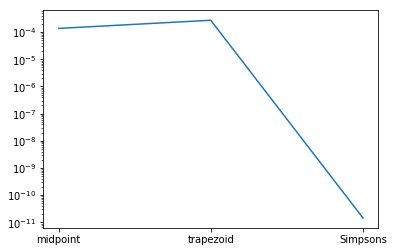

In [3]:
x = sy.symbols('x')
f = 0.1 * x ** 4 + (-1.5) * x ** 3 + 0.53 * x ** 2 + 2 * x + 1
a, b, N = (-10, 10, 10000)
F = sy.integrate(f)

#Lambdifying the two symbolic functions
g = sy.lambdify(x, f)
G = sy.lambdify(x, F)
y_sym = G(b) - G(a)
abs_error = {}

for i in ["midpoint", "trapezoid", "Simpsons"]:
    abs_error[i] = abs(num_integration(g, a, b, N, method = i) - y_sym)

method = list(abs_error.keys())
errors = list(abs_error.values())

plt.semilogy(method, errors)

##### The absolute error in the approximate integral value is very close to the actual integral value. We can also infer that both the midpoint and the trapezoid methods provide more-or-less the same accuracy while the Simpsons method provides the most accurate approximation of the integral.

### Problem 2 (Ex. 2.2)

In [4]:
def integrate_normal(mu, sigma, N, k):
    a = mu - k * sigma
    b = mu + k * sigma
    z = np.linspace(a, b, N)
    w = []
    for i in range(N):
        if i == 0:
            mp = (z[i] + z[i + 1]) / 2
            w.append(round(ss.norm.cdf(mp, mu, sigma), 4))
        elif i == (N - 1):
            mp = (z[i - 1] + z[i]) / 2
            w.append(round(1 - ss.norm.cdf(mp, mu, sigma), 4))
        else:
            mp_lb = (z[i - 1] + z[i]) / 2
            mp_ub = (z[i] + z[i + 1]) / 2
            w.append(round(ss.norm.cdf(mp_ub, mu, sigma) - ss.norm.cdf(mp_lb, mu, sigma), 4))
    return (w, z)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


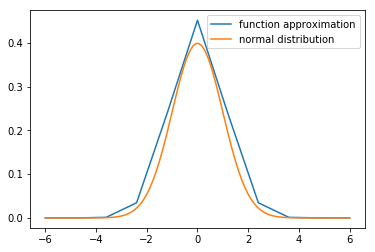

In [5]:
mu, sigma, N, k = 0, 1, 11, 6
w, z = integrate_normal(mu, sigma, N, k)
plt.plot(z, w, label = "function approximation")

x = np.linspace(mu - k*sigma, mu + k*sigma, 100)
plt.plot(x, mlab.normpdf(x, mu, sigma), label = "normal distribution")

plt.legend()

##### Approximated figure resembles the normal distribution

### Problem 3 (Ex. 2.3)

In [6]:
def integrate_lognormal(mu, sigma, N, k):
    a = mu - k * sigma
    b = mu + k * sigma
    z = np.exp(np.linspace(a, b, N))
    w = []
    for i in range(N):
        if i == 0:
            mp = (z[i] + z[i + 1]) / 2
            w_val = ss.lognorm.cdf(mp, sigma, 0, np.exp(mu))
            w.append(round(w_val, 4))

        elif i == (N - 1):
            mp = (z[i - 1] + z[i]) / 2
            w_val = 1 - ss.lognorm.cdf(mp, sigma, 0, np.exp(mu))
            w.append(round(w_val, 4))
            
        else:
            mp_lb = (z[i - 1] + z[i]) / 2
            mp_ub = (z[i] + z[i + 1]) / 2
            w_val_lb = round(ss.lognorm.cdf(mp_lb, sigma, 0, np.exp(mu)), 4)
            w_val_ub = round(ss.lognorm.cdf(mp_ub, sigma, 0, np.exp(mu)), 4)
            w.append(round(w_val_ub - w_val_lb, 4))

    return (np.array(w), z)

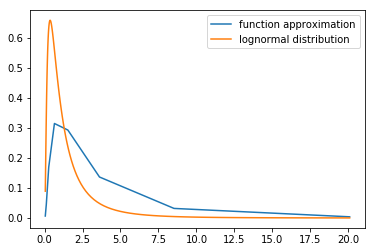

In [7]:
mu, sigma, N, k = 0, 1, 8, 3
w, z = integrate_lognormal(mu, sigma, N, k)
plt.plot(z, w, label = "function approximation")

x = np.exp(np.linspace(mu - k*sigma, mu + k*sigma, 100))
plt.plot(x, ss.lognorm.pdf(x, sigma, 0, np.exp(mu)), label = "lognormal distribution")

plt.legend()

##### Approximated figure resembles the lognormal distribution

### Problem 4 (Ex. 2.4)

In [8]:
#Calculating the approx expected income as the area under the pdfd curve = z * w
mu, sigma, N, k = 10.5, 0.8, 1000, 10
w, z = integrate_lognormal(mu, sigma, N, k)
approx_eincome = sum(w * z)
act_eincome = math.exp(mu + (sigma ** 2) / 2)
print("Approximate expected income = ${:0.3f}".format(approx_eincome))
print("Actual expected income = ${:0.3f}".format(act_eincome))
print("Difference = ${:0.3f}".format(approx_eincome - act_eincome))

Approximate expected income = $50002.054
Actual expected income = $50011.087
Difference = $-9.034


### Problem 7 (Ex 4.1)

In [11]:
def monte_carlo(g, omega, N):
    SEED = 25
    np.random.seed(SEED)
    x_lb, x_ub = omega[0][0], omega[0][1]
    y_lb, y_ub = omega[1][0], omega[1][1]
    area = (x_ub - x_lb) * (y_ub - y_lb)
    x_vals = np.random.uniform(x_lb, x_ub, N)
    y_vals = np.random.uniform(y_lb, y_ub, N)
    loc_vec = [g(x_vals[i], y_vals[i]) for i in range(N)]
    
    return area * sum(loc_vec) / len(loc_vec)

In [10]:
def g(x, y):
    return (x ** 2 + y ** 2) <= 1
omega = [[-1,1], [-1,1]]
N = 2
while 1:
    if round(monte_carlo(g, omega, N), 4) != 3.1415:
        N += 1
    else:
        print("smallest N value to achieve 3.1415 = ", N)
        break

smallest N value to achieve 3.1415 =  1668


### Problem 8

In [33]:
def isPrime(n):
    for i in range(2, int(np.sqrt(n) + 1)):
        if n % i == 0:
            return False
    return True

def primes_ascend(N, min_val=2):
    primes_vec = np.zeros(N, dtype=int)
    MinIsEven = 1 - min_val % 2
    MinIsGrtrThn2 = min_val > 2
    curr_prime_ind = 0
    if not MinIsGrtrThn2:
        i = 2
        curr_prime_ind += 1
        primes_vec[0] = i
    i = min(3, min_val + (MinIsEven * 1))
    while curr_prime_ind < N:
        if isPrime(i):
            curr_prime_ind += 1
            primes_vec[curr_prime_ind - 1] = i
        i += 2
    return primes_vec

In [170]:
def gen_sequence(n, d, seq_type):
    primes = np.array(primes_ascend(d))
    if seq_type == "weyl":
        return [math.modf(i)[0] for i in n * (primes ** 0.5)]
    elif seq_type == "haber":
        return [math.modf(i)[0] for i in n * (n+1)/2 * (primes ** 0.5)]
    elif seq_type == "niederreiter":
        exp2 = np.array([2 ** ((i+1) / (n+1)) for i in range(d)])
        return [math.modf(i)[0] for i in n * exp2]
    elif seq_type == "baker":
        r = np.array([np.exp(1/(i+1)) for i in range(d)])
        return [math.modf(i)[0] for i in n * r]
    else:
        return None

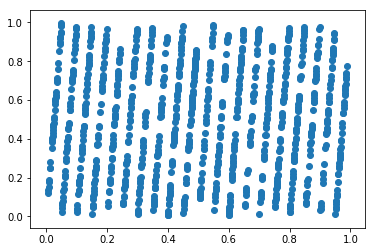

In [171]:
a = gen_sequence(1, 1000, "weyl")
b = gen_sequence(20, 1000, "weyl")
plt.scatter(a,b)

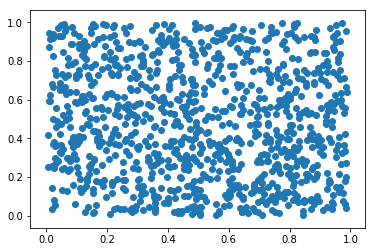

In [172]:
a = gen_sequence(1, 1000, "haber")
b = gen_sequence(20, 1000, "haber")
plt.scatter(a,b)

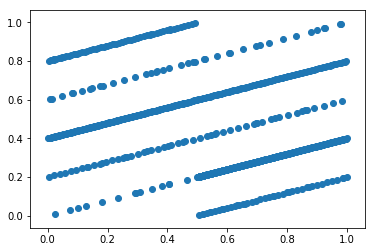

In [173]:
a = gen_sequence(500, 1000, "baker")
b = gen_sequence(200, 1000, "baker")
plt.scatter(a,b)

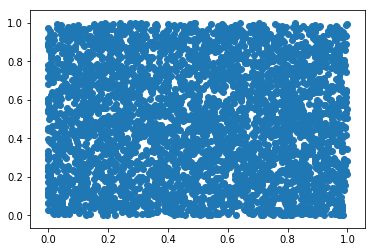

In [174]:
a = gen_sequence(100, 4000, "niederreiter")
b = gen_sequence(900, 4000, "niederreiter")
plt.scatter(a,b)

### Problem 9

In [205]:
d = 2
def monte_carlo(g, omega, N, seq_type):
    n, d = 25, N

    x_lb, x_ub = omega[0][0], omega[0][1]
    y_lb, y_ub = omega[1][0], omega[1][1]
    area = (x_ub - x_lb) * (y_ub - y_lb)
    
    x_vals = [gen_sequence(n, d, seq_type)[0] for i in range(N)]
    x_vals = np.array(x_vals) * (x_ub - x_lb) + x_lb
    y_vals = [gen_sequence(n, d, seq_type)[0] for i in range(N)]
    y_vals = np.array(y_vals) * (y_ub - y_lb) + y_lb
    loc_vec = [g(x_vals[i], y_vals[i]) for i in range(N)]
    
    return area * sum(loc_vec) / len(loc_vec)

In [ ]:
def g(x, y):
    return (x ** 2 + y ** 2) <= 1
omega = [[-1,1], [-1,1]]
N = 500
monte_carlo(g, omega, N, "weyl")

In [204]:
d

2

In [ ]:
N = 2
while 1:
    if round(monte_carlo(g, omega, N), 4) != 3.1415:
        N += 1
    else:
        print("smallest N value to achieve 3.1415 = ", N)
        break